In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
C_file = './data/clustering_run1511_Nsig_8_Mcut_300_Pcut_0_scale_8_close_2_nccs.txt'
C_file = './data/clustering_run1511_Nsig_9_Mcut_300_Pcut_0_scale_4_close_2_nccs.txt'
#C_file = './data/clustering_run813_Nsig_1_Mcut_350_Pcut_0_scale_4_close_2_nccs.txt'

VarNames=["iTr", "TrOk", "SumLight", "SumBck", "SumPixel", "pClose", "x0m", "x0s", "y0m", "y0s", "ddx", "ddy", "x0start", "y0start", "x0end", "y0end"]
df = pd.read_csv(C_file, sep=" ", dtype='float64', names=VarNames)


$P(A \mid B) = \frac{P(B \mid A)P(A)}{P(B)}$

In [3]:
df.head()

,iTr,TrOk,SumLight,SumBck,SumPixel,pClose,x0m,x0s,y0m,y0s,ddx,ddy,x0start,y0start,x0end,y0end
0,0.0,0.0,5531.0,4740.49,25.0,3.0,1028.0,33.447098,49.0,7.852813,7.0,11.0,1028.0,44.0,1028.0,52.0
1,0.0,1.0,3686.0,3164.27,20.0,2.0,1509.0,45.459641,91.0,7.258389,3.0,7.0,1508.0,88.0,1508.0,92.0
2,0.0,2.0,3672.0,3164.18,16.0,2.0,1483.0,44.531637,95.0,13.988090,7.0,7.0,1480.0,92.0,1484.0,96.0
3,0.0,3.0,5511.0,4729.15,25.0,3.0,1341.0,42.455859,116.0,15.390744,11.0,11.0,1344.0,112.0,1336.0,120.0
4,0.0,4.0,5515.0,4735.07,30.0,3.0,1140.0,25.176618,124.0,7.542980,7.0,7.0,1140.0,120.0,1140.0,124.0


In [18]:
df.info()
track_lenght = np.sqrt(df['ddx']**2+df['ddy']**2)
photons      = df['SumLight']-df['SumBck']
pixel        = df['SumPixel']
dff = pd.DataFrame({'photons':photons,'pixel':pixel , 'track_lenght':track_lenght})
dff.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380625 entries, 0 to 380624
Data columns (total 16 columns):
iTr         380625 non-null float64
TrOk        380625 non-null float64
SumLight    380625 non-null float64
SumBck      380625 non-null float64
SumPixel    380625 non-null float64
pClose      380625 non-null float64
x0m         380625 non-null float64
x0s         380625 non-null float64
y0m         380625 non-null float64
y0s         380625 non-null float64
ddx         380625 non-null float64
ddy         380625 non-null float64
x0start     380625 non-null float64
y0start     380625 non-null float64
x0end       380625 non-null float64
y0end       380625 non-null float64
dtypes: float64(16)
memory usage: 46.5 MB


,photons,pixel,track_lenght
0,790.51,25.0,13.038405
1,521.73,20.0,7.615773
2,507.82,16.0,9.899495
3,781.85,25.0,15.556349
4,779.93,30.0,9.899495


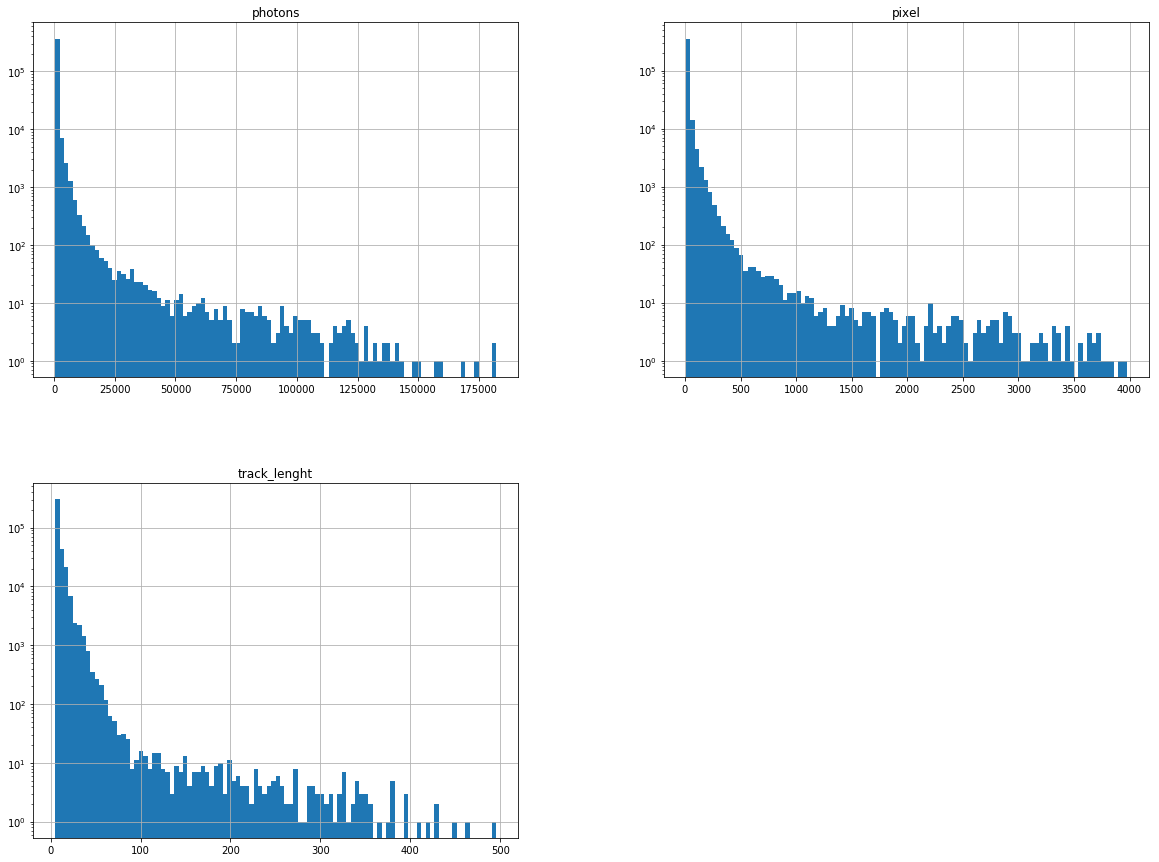

In [19]:
dff.hist(bins=100, figsize=(20,15), log=True)
plt.show()

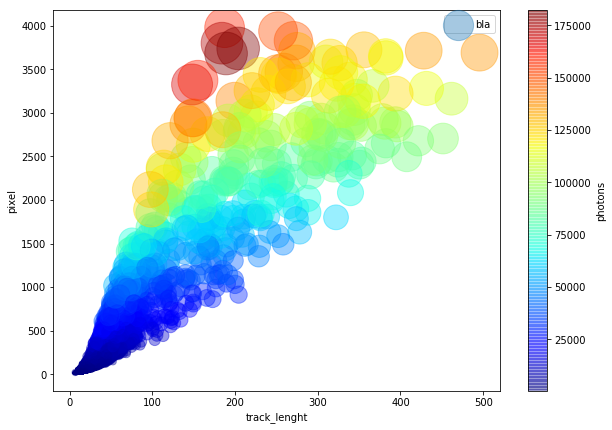

In [20]:
#plt.plot(dl, lp, '.r')
#plt.ylim(0,70)
#plt.xscale('log')
#plt.show()
dff.plot(kind="scatter", x="track_lenght", y="pixel", alpha=0.4,
    s=dff["photons"]/100, label="bla", figsize=(10,7),
    c="photons", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.show()

In [21]:
from sklearn import cluster
X = np.array(dff)
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

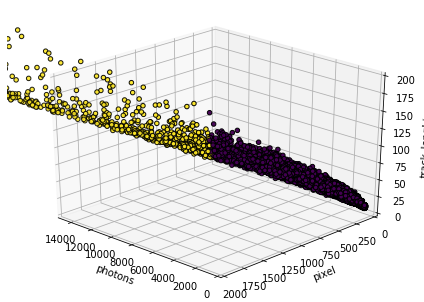

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
labels = dff.columns
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=28, azim=134)
labels = k_means.labels_
ax.scatter(X[:,0], X[:,1], X[:,2], c=labels.astype(np.float), edgecolor='k')

ax.set_xlim3d(0, 15000)
ax.set_ylim3d(0, 2000)
#ax.set_yscale('log')
ax.set_zlim3d(0, 200)
ax.set_xlabel('photons')
ax.set_ylabel('pixel')
ax.set_zlabel('track_lenght')
plt.show()


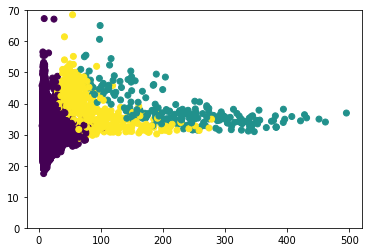

In [23]:
labels = dff.columns
labels = k_means.labels_
plt.scatter(X[:,2], X[:,0]/X[:,1], c=labels.astype(np.float))
#plt.xscale('log')
plt.ylim(0,70)
plt.show()

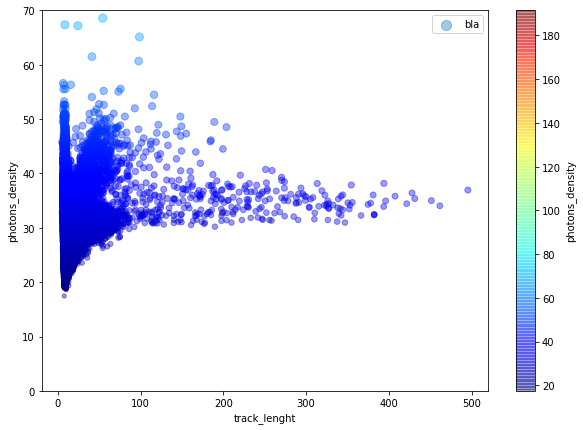

In [24]:
track_lenght = np.sqrt(df['ddx']**2+df['ddy']**2)
photons_density = (df['SumLight']-df['SumBck'])/df['SumPixel']
dff2 = pd.DataFrame({'photons_density':photons_density, 'track_lenght':track_lenght})
dff2.plot(kind="scatter", x="track_lenght", y="photons_density", alpha=0.4,
    s=dff2["photons_density"], label="bla", figsize=(10,7),
    c="photons_density", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.ylim(0,70)
plt.show()

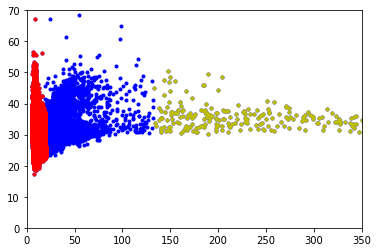

In [25]:
from sklearn import cluster
X = np.array(dff2)
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X)
labels = k_means.labels_

#plt.scatter(X[:,1], X[:,0], c=labels.astype(np.float))
#plt.xscale('log')
plt.plot(X[:,1], X[:,0],'b.', label="bla")
plt.plot(X[:,1][labels==0], X[:,0][labels==0],'r.', label="bla")
plt.plot(X[:,1][labels==1], X[:,0][labels==1],'y.', label="bla")
#plt.plot(X[:,1][labels==2], X[:,0][labels==2],'g.', label="bla")
plt.ylim(0,70)
plt.xlim(0,350)
plt.show()

In [26]:
from sklearn.neighbors import NearestNeighbors
X = df.values
#X = [lig, lun]
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [27]:
df_sig=df[df.SumPixel>80]
df_bkg=df[df.SumPixel<=80]

TrOk


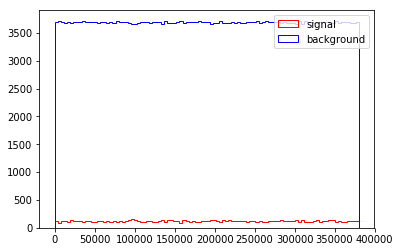

SumLight


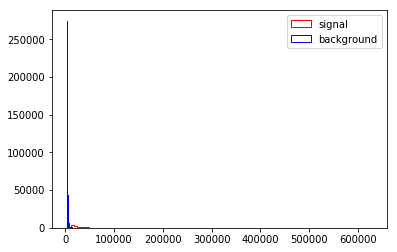

SumBck


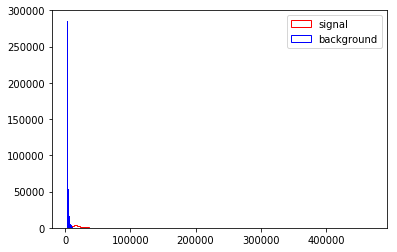

SumPixel


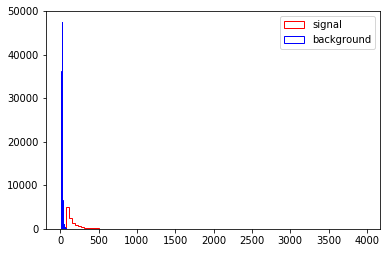

pClose


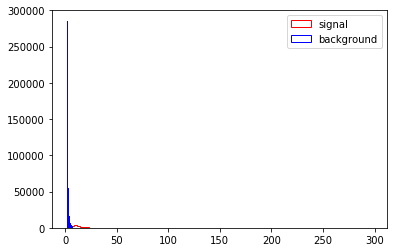

x0m


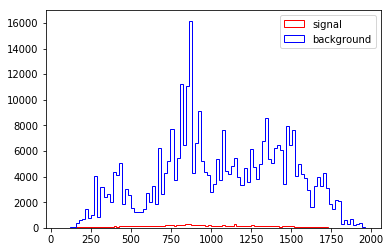

x0s


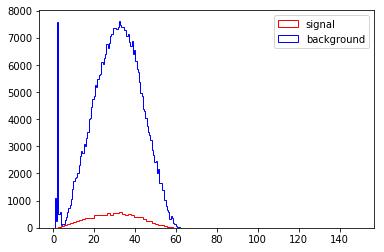

y0m


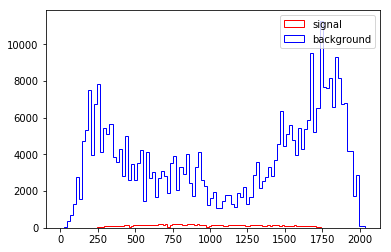

y0s


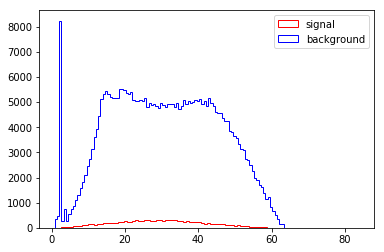

ddx


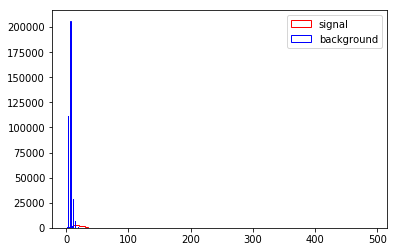

ddy


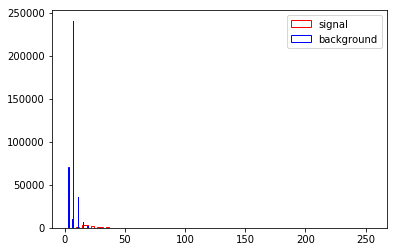

x0start


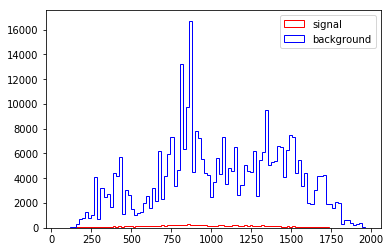

y0start


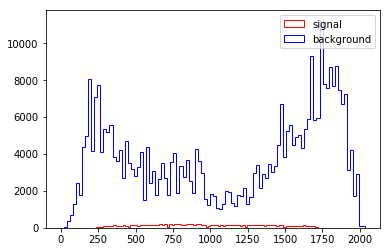

x0end


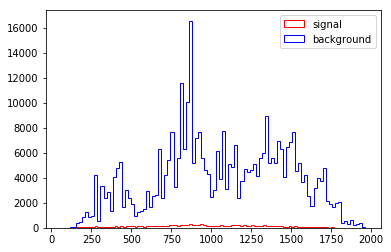

y0end


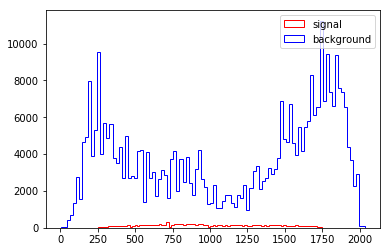

In [28]:
for var in VarNames[1:]:
    print (var)
    plt.figure()
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",stacked=True)
    plt.legend(loc='upper right')
    plt.show()

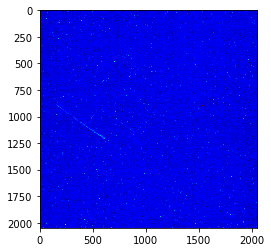

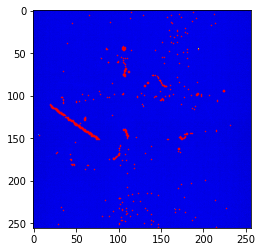

In [55]:
import numpy as np
import cygnus_lib as cy
import matplotlib.pyplot as plt
import mylib as my
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import scipy.stats as stats
%matplotlib inline
x_resolution = y_resolution = 2048
from itertools import combinations
pixelscale  = 0.125 #55e-3 #Orange 0.125 for lemonn mm/pixel
nsigma      = 1
run         = 1511
traccia     = 1 #3
cimax       = 300
cimin       = 95# 85
dataSelection = 'LTD'
rescale = 256
image = cy.swift_read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, run, traccia))
plt.imshow(image, vmin=cimin,vmax=cimax, cmap='jet')
th_image = image
plt.show()
rebin_image     = cy.rebin(image, (rescale, rescale))
rebin_th_image = 116
plt.imshow(rebin_image, vmin=cimin,vmax=cimax, cmap='jet')
edges           = (rebin_image > rebin_th_image) & (rebin_image < cimax)         
points          = np.array(np.nonzero(edges)).T.astype(float) 
plt.plot(points[:,1], points[:,0], 'r.', markersize=1)
plt.show()

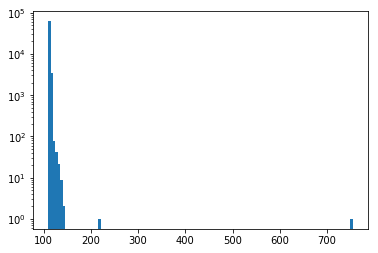

In [56]:
plt.hist(rebin_image.ravel(),bins=128, log=True)
plt.show()
#from sklearn import cluster
#import numpy as np
#y,x = np.histogram(rebin_image.ravel(), bins=128)
#X = np.asmatrix(np.array([x[1:],y]))
#k_means = cluster.KMeans(n_clusters=2)
#k_means.fit(X)
#labels = k_means.labels_
#plt.hist(X, range=(0,300), bins=128)
#plt.hist(X[labels==0], range=(0,300), bins=128,color = 'r')
#plt.yscale('log')
#plt.show()

In [57]:

from sklearn.neighbors import NearestNeighbors
X = rebin_image
#X = [lig, lun]
nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(X)
distances, indices = nbrs.kneighbors(X)

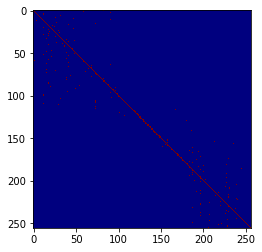

In [58]:
nbrs.kneighbors_graph(X).toarray()
plt.imshow(nbrs.kneighbors_graph(X).toarray(), vmin=0,vmax=1, cmap='jet')
plt.show()


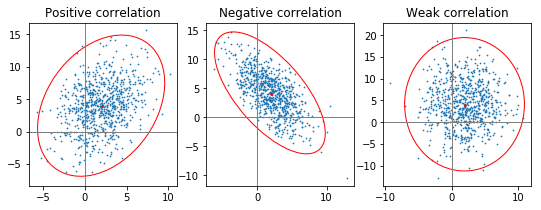

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)
def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]
np.random.seed(0)

PARAMETERS = {
    'Positive correlation': np.array([[0.85, 0.35],
                                      [0.15, -0.65]]),
    'Negative correlation': np.array([[0.9, -0.4],
                                      [0.1, -0.6]]),
    'Weak correlation': np.array([[1, 0],
                                  [0, 1]]),
}

mu = 2, 4
scale = 3, 5

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for ax, (title, dependency) in zip(axs, PARAMETERS.items()):
    x, y = get_correlated_dataset(800, dependency, mu, scale)
    ax.scatter(x, y, s=0.5)

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax, edgecolor='red')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)

plt.show()

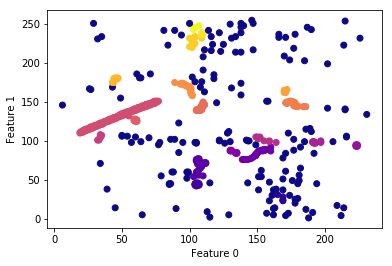

-1 165 2241.6875 13.585984848484848
0 4 48.828125 12.20703125
1 15 184.90625 12.327083333333333
2 36 468.34375 13.00954861111111
3 25 320.015625 12.800625
4 8 96.5 12.0625
5 6 72.046875 12.0078125
6 10 121.921875 12.1921875
7 11 135.125 12.284090909090908
8 7 84.40625 12.058035714285714
9 166 2256.125 13.591114457831326
10 10 121.921875 12.1921875
11 25 320.015625 12.800625
12 24 305.546875 12.731119791666666
13 23 292.125 12.701086956521738
14 6 72.046875 12.0078125
15 9 109.15625 12.128472222222221
16 9 109.15625 12.128472222222221
17 3 36.671875 12.223958333333334
89.0 102.0 158.0 175.0 22 [175.  89.]
95.5 166.5 6.5 8.5 -0.9179496956941223


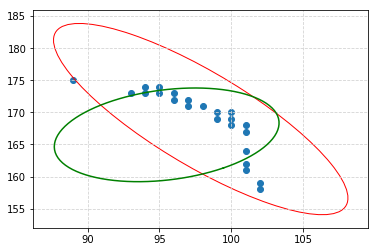

In [70]:
def cluster_elips(points):
    x0i= np.argmin(points[:,1])
    a0 = points[x0i][1]
    x1i= np.argmax(points[:,1])
    a1 = points[x1i][1]
    y0i= np.argmin(points[:,0])
    b0 = points[y0i][0]
    y1i= np.argmax(points[:,0])
    b1 = points[y1i][0]
    print (a0, a1, b0, b1, x0i, points[x0i])
    a  = (a1 - a0)/2.
    b  = (b1 - b0)/2.
    x0 = (a1 + a0)/2.
    y0 = (b1 + b0)/2.
    theta = np.arctan((points[x1i][0]-points[x0i][0])/(points[x1i][1]-points[x0i][1]))
    return x0, y0, a , b, theta

from matplotlib import patches
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(points)

dbscan = DBSCAN(eps=0.1, min_samples = 4)
dbscan.fit(points)

clusters = dbscan.fit_predict(X_scaled)
plt.scatter(points[:,1], points[:,0], c=dbscan.labels_, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

dbscan.labels_

#print(rebin_image[int(points[0,1]), int(points[0,0])])
#plt.scatter(points[:,1][dbscan.labels_==9], points[:,0][dbscan.labels_==9])
#plt.xlabel("Feature 0")
#plt.xlim(0,128)
#plt.ylabel("Feature 1")
#plt.ylim(0,128)
#plt.show()

for i in range (min(dbscan.labels_), max(dbscan.labels_)):
    ph = 0
    for j in range(0, len(points[:,1][dbscan.labels_==i])):
        ph += (rebin_image[int(points[j,1]), int(points[j,0])])-100
    print(i,np.sum([dbscan.labels_==i]), ph, ph/np.sum([dbscan.labels_==i]))
    #plt.scatter(points[:,1][dbscan.labels_==i], points[:,0][dbscan.labels_==i])
    #plt.xlabel("Feature 0")
    #plt.xlim(0,128)
    #plt.ylabel("Feature 1")
    #plt.ylim(0,128)
    #plt.show()
#    print(points[:,1][dbscan.labels_==i])
#    x = int(points[:,0][dbscan.labels_==i])
#    print(rebin_image[int(points[0,1][dbscan.labels_==i]), int(points[0,0][dbscan.labels_==i])])
plt.show()
fig, ax = plt.subplots()
ic = 13
ax.scatter(points[:,1][dbscan.labels_==ic], points[:,0][dbscan.labels_==ic])
x0, y0, a, b, theta = cluster_elips(points[dbscan.labels_==ic])
confidence_ellipse(points[:,1][dbscan.labels_==ic], points[:,0][dbscan.labels_==ic], ax, edgecolor='red')
t = np.linspace(0, 2*np.pi, 100)
print (x0, y0, a, b, theta)
plt.plot(x0 + a*np.cos(t)*np.cos(theta) - b*np.sin(t)*np.sin(theta) , 
         y0 + b*np.sin(t)*np.cos(theta) + a*np.cos(t)*np.sin(theta), 'g-')
plt.grid(color='lightgray',linestyle='--')
#plt.xlim(0,rebin_image.shape[0])
#plt.ylim(0,rebin_image.shape[1])
plt.show()

In [17]:
import numpy as np
import cygnus_lib as cy
import matplotlib.pyplot as plt
import mylib as my
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
nsigma      = 1
run         = 1511
cimax       = 300
cimin       = 95# 85
dataSelection = 'LTD'
rescale = 256
rebin_th_image = 116
max_image=np.size(cy.swift_listdir(cy.file2FullPathCygnus(dataSelection, run, 'H5')))
data_to_save = []
for iTr in range(0, max_image):

    image = cy.swift_read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, run, iTr))
    rebin_image     = cy.rebin(image, (rescale, rescale))

    edges           = (rebin_image > rebin_th_image) & (rebin_image < cimax)         
    points          = np.array(np.nonzero(edges)).T.astype(float) 
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(points)

    dbscan = DBSCAN(eps=0.1, min_samples = 4)
    dbscan.fit(points)

    clusters = dbscan.fit_predict(X_scaled)
    if iTr % 20 == 0:
        print ('Event:', iTr)
        plt.imshow(rebin_image, vmin=cimin,vmax=cimax, cmap='jet')
        plt.scatter(points[:,1], points[:,0], c=dbscan.labels_, cmap="plasma")
        plt.xlim(0,rescale)
        plt.ylim(0,rescale)
        plt.show()
    for i in range (min(dbscan.labels_), max(dbscan.labels_)):
        ph = 0
        for j in range(0, len(points[:,1][dbscan.labels_==i])):
            ph += (rebin_image[int(points[j,1]), int(points[j,0])])-cimin
        #print(iTr, i, np.sum([dbscan.labels_==i]), ph, ph/np.sum([dbscan.labels_==i]))
        data_to_save.append([iTr, i, np.sum([dbscan.labels_==i]), ph, ph/np.sum([dbscan.labels_==i])])
files = ("./data/dbscan_run%d_cmin_%d_cmax_%d_rescale_%d.txt" % 
                 (run, cimin, cimax, rescale))
np.savetxt(files, data_to_save, fmt='%.10e', delimiter=" ")
print ("out file", files)

KeyboardInterrupt: 

In [157]:
C_file = './data/dbscan_run1511_cmin_95_cmax_300_rescale_256.txt'

VarNames=["iTr", "cluster_lable", "pixels", "photons", "ph_pixels"]
df = pd.read_csv(C_file, sep=" ", dtype='float64', names=VarNames)

In [158]:
df.head()#[df['cluster_lable']==2]
df.iloc[:,1:4].head()

,cluster_lable,pixels,photons
0,-1.0,180.0,3338.50000
1,0.0,6.0,102.46875
2,1.0,45.0,811.93750
3,2.0,33.0,586.40625
4,3.0,13.0,222.28125


23579 23579


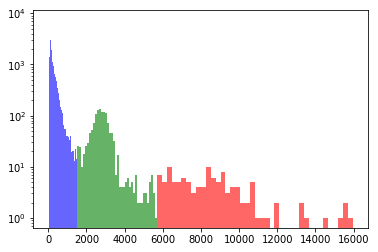

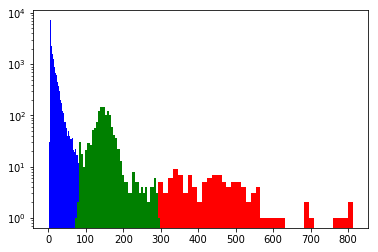

In [159]:
from sklearn import cluster
#X = df.iloc[:,2:4]
X = df.iloc[:,1:4]
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X)
labels = k_means.labels_
print (len(labels), len(df.iloc[:,2]))
plt.hist(X.iloc[:,2][labels==0], bins=40, color='b', log=True, alpha=0.6)
plt.hist(X.iloc[:,2][labels==1], bins=40, color='r', log=True, alpha=0.6)
plt.hist(X.iloc[:,2][labels==2], bins=40, color='g', log=True, alpha=0.6)
plt.hist(X.iloc[:,2][labels==3], bins=40, color='y', log=True, alpha=0.6)

plt.show()
plt.hist(X.iloc[:,1][labels==0], bins=40, color='b', log=True)
plt.hist(X.iloc[:,1][labels==1], bins=40, color='r', log=True)
plt.hist(X.iloc[:,1][labels==2], bins=40, color='g', log=True)
plt.hist(X.iloc[:,1][labels==3], bins=40, color='y', log=True)


plt.show()

In [103]:
X.head()

,cluster_lable,pixels,photons
0,-1.0,180.0,3338.50000
1,0.0,6.0,102.46875
2,1.0,45.0,811.93750
3,2.0,33.0,586.40625
4,3.0,13.0,222.28125


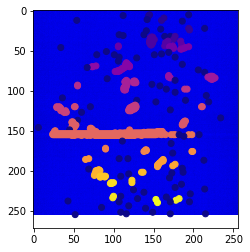

85 1545.78125
2 36.59375
2 36.59375
2 36.59375
2 36.59375
41 736.5625
3 54.3125
2 36.59375
2 36.59375
5 88.40625
5 88.40625
28 502.0
3 54.3125
4 71.03125
12 213.21875
24 429.125
10 175.96875
2 36.59375
2 36.59375
43 773.265625
16 284.734375
2 36.59375
2 36.59375
11 194.9375
15 266.953125
418 8540.359375
3 54.3125
2 36.59375
2 36.59375
5 88.40625
2 36.59375
2 36.59375
12 213.21875
2 36.59375
12 213.21875
2 36.59375
10 175.96875
2 36.59375
5 88.40625
2 36.59375
2 36.59375


ValueError: Incorrect number of features. Got 2 features, expected 3

In [107]:
run         = 1511
traccia     = 2 #3
cimax       = 300
cimin       = 95# 85
dataSelection = 'LTD'
rescale = 256
image = cy.swift_read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, run, traccia))
rebin_image     = cy.rebin(image, (rescale, rescale))
rebin_th_image = 116
plt.imshow(rebin_image, vmin=cimin,vmax=cimax, cmap='jet')
edges           = (rebin_image > rebin_th_image) & (rebin_image < cimax)         
points          = np.array(np.nonzero(edges)).T.astype(float) 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(points)

dbscan = DBSCAN(eps=0.1, min_samples = 2)
dbscan.fit(points)

clusters = dbscan.fit_predict(X_scaled)
plt.scatter(points[:,1], points[:,0], c=dbscan.labels_, cmap="plasma")
plt.show()
data = []

for i in range (min(dbscan.labels_), max(dbscan.labels_)):
    ph = 0
    for j in range(0, len(points[:,1][dbscan.labels_==i])):
        ph += (rebin_image[int(points[j,1]), int(points[j,0])])-cimin
    data.append([np.sum([dbscan.labels_==i]), ph])
    print (np.sum([dbscan.labels_==i]), ph)
print(k_means.predict(data))